This notebook explains about Perceptron and its implementation:
1. with using sklearn and
2. without using sklearn 

**Perceptron** is the first simplest Neural Network Model.  

Perceptron is a binary classifier, in which Activation function is Step function. 

Perceptron is this single neuron which is loosely inspired from the biological neuron and is not an exact replica but is powerful enough to solve many interesting problems. 

A perceptron can also be understood as a linear function trying to find a line that separates two classes of datapoint. Class 1, -1. It’s a binary classifier. 

For perceptron activation function which is step function is given by: 
f(x) =[1 if W.T * x + b >0; 0 otherwise]

**Perceptron**:
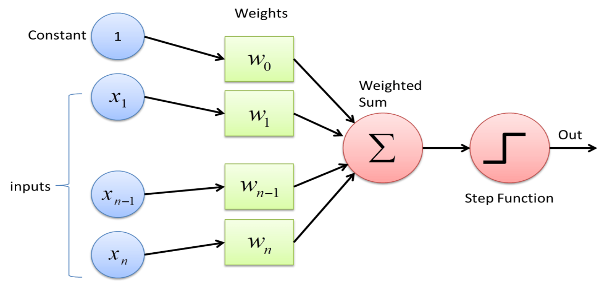

**Step function used in Perceptron**:
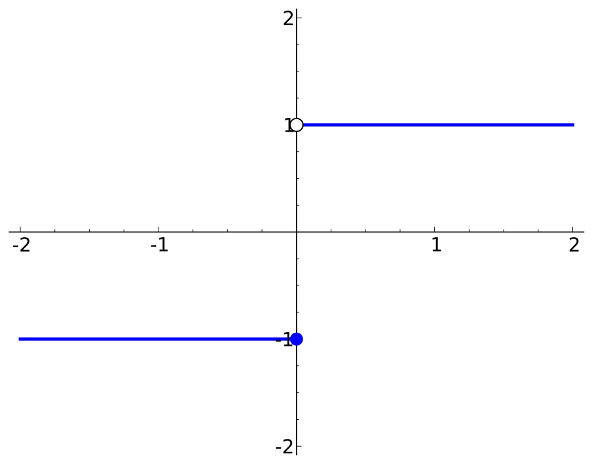


*Importing some libraries to use later*

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as plt

Create dataset with 2 classes

In [14]:
X, y = datasets.make_classification(n_samples=110, 
                                    n_features = 2, 
                                    n_redundant=0, 
                                    n_classes = 2, 
                                    random_state=101)

Now create the Perceptron class object and train out data on it

In [15]:
from sklearn .linear_model import Perceptron
perc = Perceptron()
perc.fit(X, y)

Perceptron will create linear line/plane/hyperplane to separate the dataset into different classes

here we are assuming binary classes dataset and Perceptron will find a est fit line to separate the data into 2 classes

In the equation w0 + w1.x1 + w2.x2 = 0
w0 is the bias term (or intercept_) and w1, w2 are weights (coef_)

In [16]:
perc.coef_

In [17]:
perc.intercept_

In [18]:
perc.score(X, y)

See the plot and decision boundry below

In [19]:
from mlxtend.plotting import plot_decision_regions as pdr
pdr(X, y, clf=perc, legend=True)

Now lets write perceptron code and train the model without using sklearn library

First lets create classification dataset with 2 classes

In [20]:
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1,
                           n_redundant = 0, n_classes = 2,n_clusters_per_class=1,
                           random_state = 41,
                        hypercube = False, class_sep = 10)

Lets plot the data using pairplot 

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Now create perceptrone method that will take X, y as input and train the model to get weight and intercept

In [4]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1) #Adding Bias term =1 to input X, output will be [1, X]
    weight = np.ones(X.shape[1]) #Now weights we need to add which is [1, 1] initially
    learning_rate = 0.1
    epoc = 1000 #In 1 epoc we will pass all training data once

    for i in range(epoc):
        j = np.random.randint(0, 99) #select a randon number between 0-99(len of X)
        y_hat = step(np.dot(X[j], weight)) #This is perceptrone with step function taking input z = X.T * w >0 onput: 1 else -1
        #For misclassified datapoint y=1/-1 y^ = -1/1 we need to update the weight  
        #For updating weight: w_new = w_old + (y-y^) * x
        #Here we are shifting weight vector w to up or down based on the sign of y-y^ (+1/-1) slightly 
        #As the missclasified datapoints increased the shifting increased for weight vector
        weight = weight + learning_rate * (y[j] - y_hat) * X[j]

    return weight[0],weight[1:] # weight[0] is bias and weight[1:] is weights or coefficient

def step(z): # here we are defining step function as Activation function
    return z > 0

In [5]:
intercept_, coef_ = perceptron(X, y)

In [6]:
print(intercept_)
print(coef_)

Given w0.x0 + w1.x1 + w2.x2 = 0

-> here x0 = 1, we can solve the equation by putting x1=0 and x2=0 
when x1=0, 
    w0 + 0 + w2x2 = 0
    x2 = -w0/w2

when x2 =0,
    w0 + w1.x1 + 0 = 0
    x1 = -w0/w1

Now with given 2 points (0, -w0/w2) and (-w0/w1, 0) slope m is given by:
    m = y2-y1/ x2-x1
    m = -w1/w2 = -coef_[0] / coef_[1]
    
intercept_ from equation x2 = m.x1 + b , put any point in equation we get:
    b = x2-m.x1
      = -(-w1/w2). (-w0/w1)
      = -w0/w2
coef_=[1.29097139, 0.07237192] = [w1, w2]

In [10]:
# mx + b
m = -(coef_[0]/coef_[1]) # slope
b = -(intercept_/coef_[1]) # intercept
print(m)
print(b)

In [11]:
x_input = np.linspace(-3, 3, 10)
y_input = x_input * m + b

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(x_input, y_input, color='b', linewidth=5)
plt.scatter(X[:, 0], X[:, 1],c=y)